In [1]:
import numpy as np 
import pandas as pd 

import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')
    

In [2]:
df = pd.read_csv("Real estate.csv")

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Firs we will drop the column `No.` as we are having index numbers so we will not be needing the Number column at all

In [4]:
df.drop("No", axis = 1, inplace = True)

In [5]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
df.tail()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [7]:
df.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [8]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [9]:
# Creating the dictionary to map old column names to new columns.
column_maping = {}
for i in df.columns:
    new_column = i[3:].capitalize().replace(' ', '_')
    column_maping[i] = new_column

In [10]:
# Now we will rename the column using the dictinary 
df.rename(columns = column_maping, inplace = True)

In [11]:
df.rename({'Ouse_price_of_unit_area': 'House_price_of_unit_area'}, axis = 1, inplace = True)

In [12]:
df.columns

Index(['Transaction_date', 'House_age', 'Distance_to_the_nearest_mrt_station',
       'Number_of_convenience_stores', 'Latitude', 'Longitude',
       'House_price_of_unit_area'],
      dtype='object')

In [13]:
df.describe()

,Transaction_date,House_age,Distance_to_the_nearest_mrt_station,Number_of_convenience_stores,Latitude,Longitude,House_price_of_unit_area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


From the above statistics description we can assume that there might be some outliers persent in our data.<br> We will look into furthere while visualisation of data.

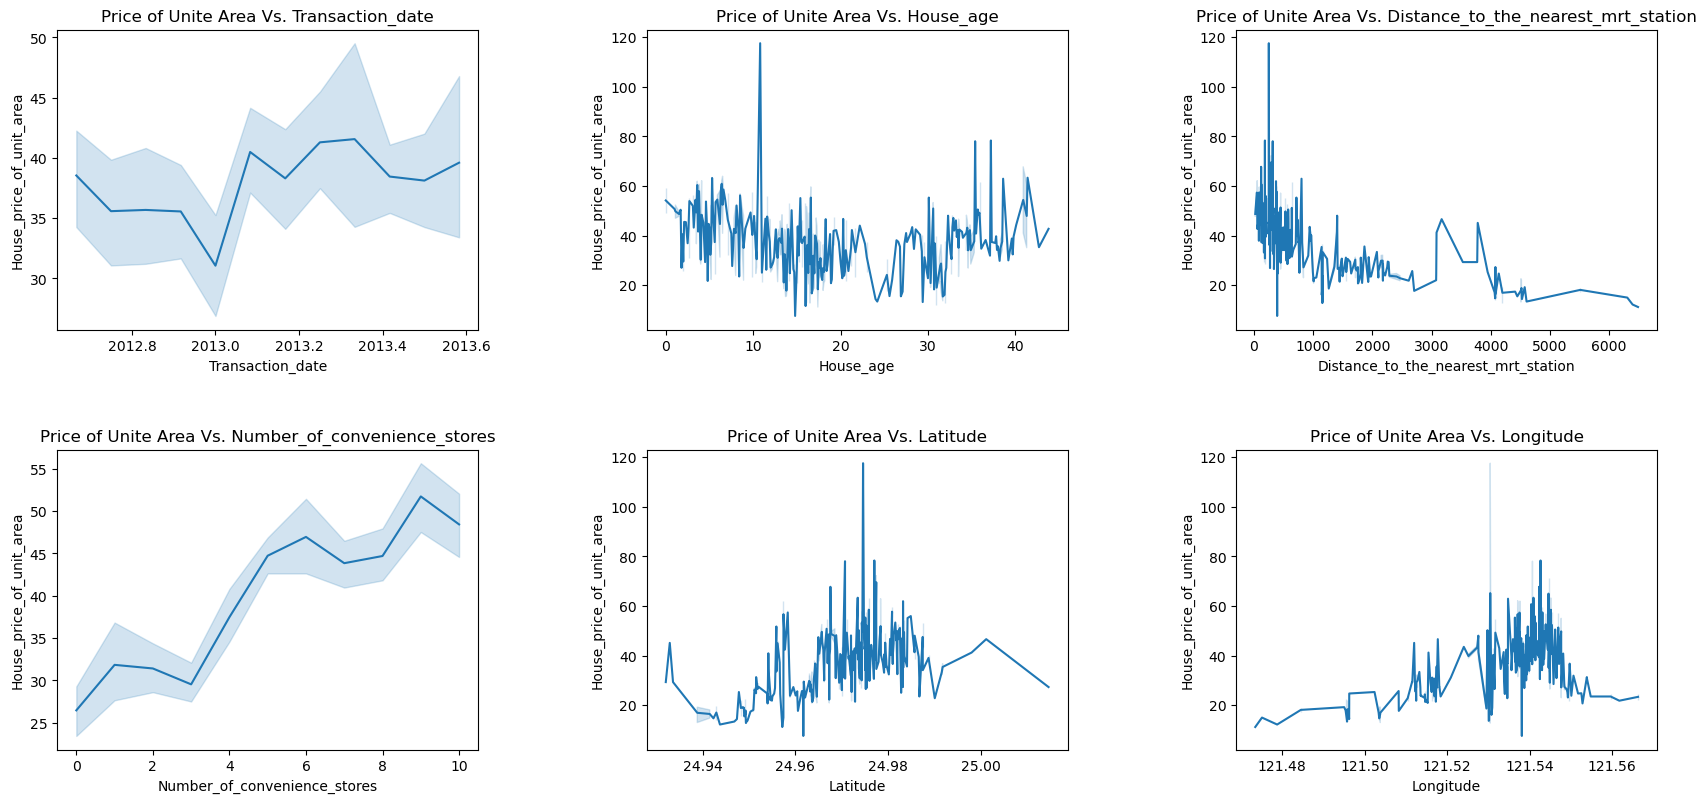

In [14]:
col_to_plot = df.columns[:-1]

fig, ax = plt.subplots(2, 3, figsize = (20,9))
ax = ax.flatten()

for i, column in enumerate(col_to_plot):
    sns.lineplot(data = df, x = column, y = 'House_price_of_unit_area', ax = ax[i])
    ax[i].set_title(f"Price of Unite Area Vs. {column}")
    
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

- We can see that the closert the distance from the the MRT Station the price of house is increasing. 
- As the number of convinent store are increasing the prices of house is also increasing.

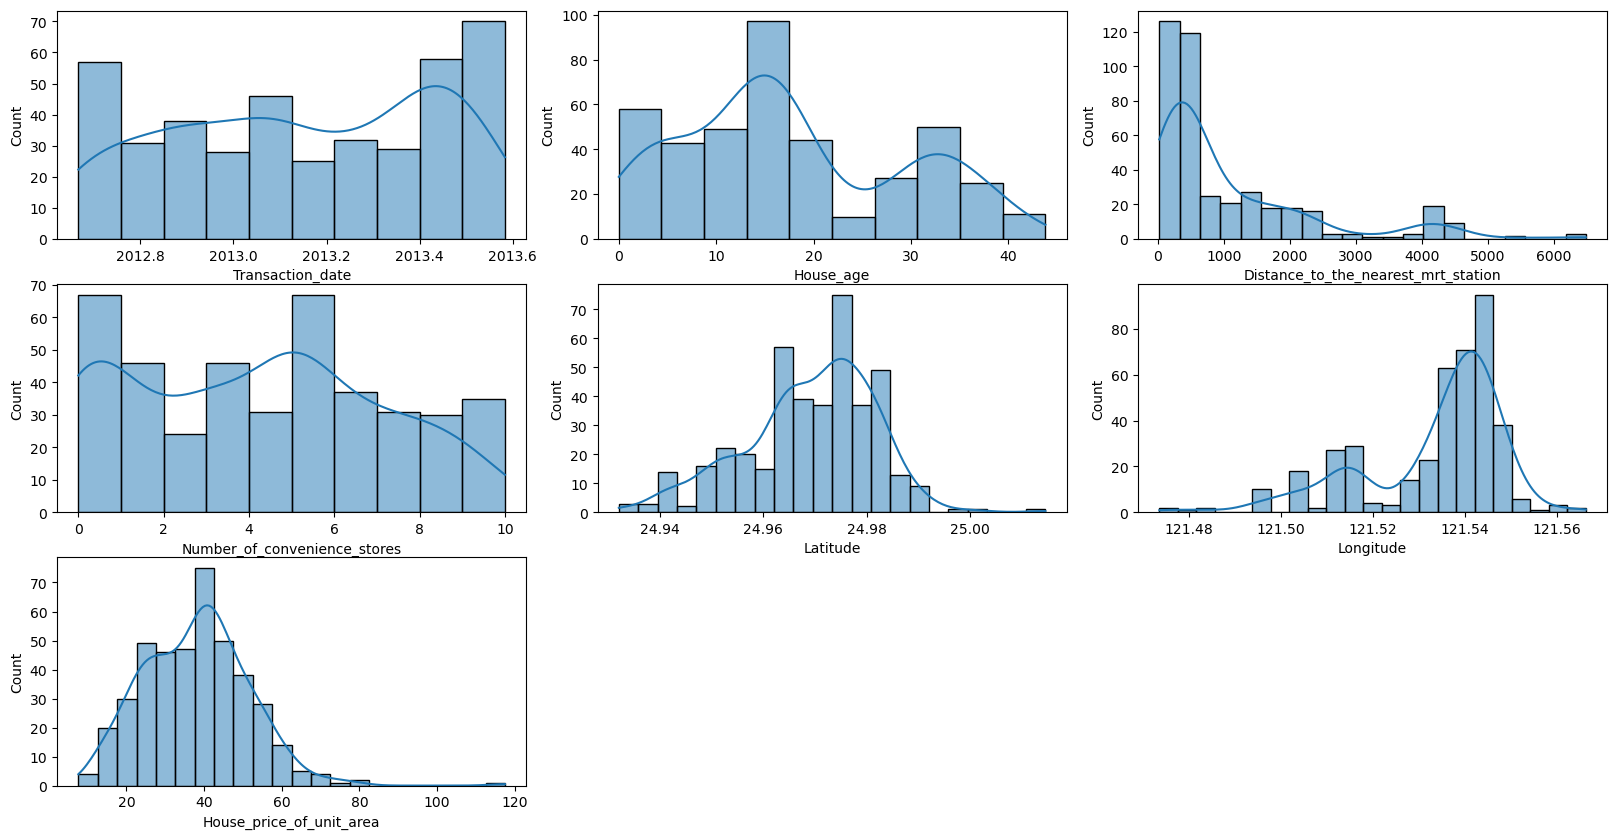

In [15]:
fig = plt.figure(figsize = (16,16))
for index, col in enumerate(df):
    plt.subplot(6,3, index +1)
    sns.histplot(df.loc[:, col], kde = True)
fig.tight_layout(pad = 0.1)

From the distribution plot we can see that some plots are gaussian, some are right skewed, some are left skewed and some are uniform distribution.


Now we will check if any of our dataset contains the outliers or not.

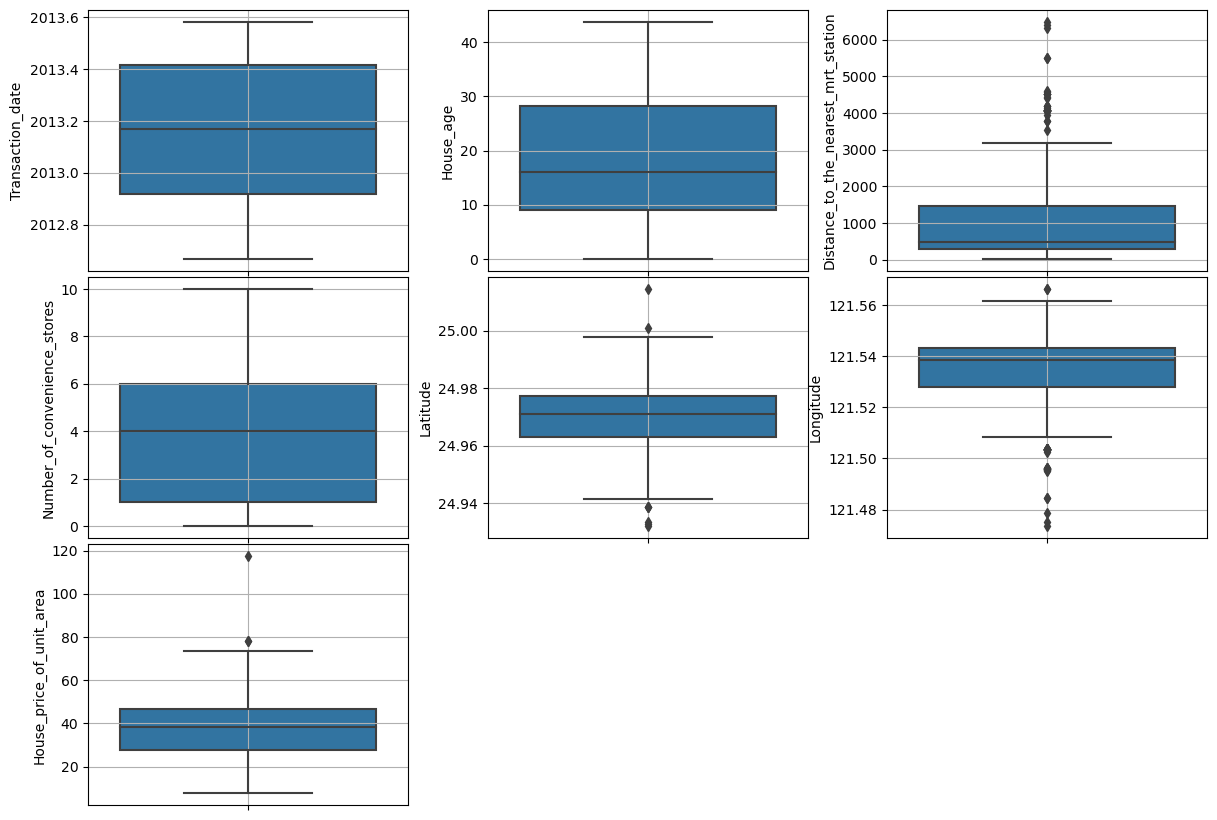

In [16]:
fig = plt.figure(figsize = (12,16))
for index, col in enumerate(df):
    plt.subplot(6,3, index +1)
    sns.boxplot(y = col, data = df)
    plt.grid()
fig.tight_layout(pad = 0.1)

from above we can see that ther are some outliers are present in our dataset in columns like
`House_price`, `Longitude`, `distance to the nearest mrt station`, `latitude`

Now there are 2 options to deal with the outliers one is to remove them but by removing the outliers we will reduse our data in some percentages and we can't afford to loose the data. <br>
We will keep the outliers as it is aftere all while scaling the data eventually the outliers we be getting scaled to at least 1, then we will not have any problems while performing the predection.

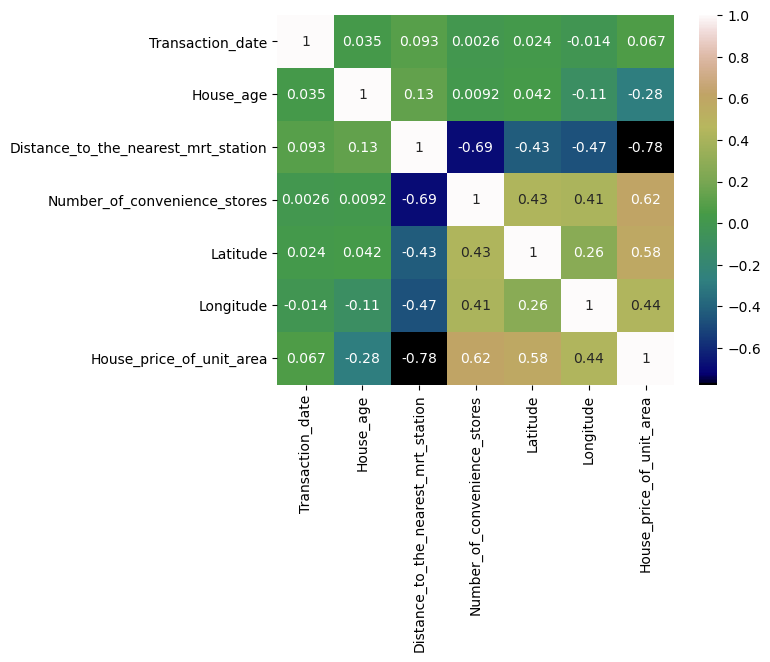

In [17]:
sns.heatmap(df.corr(method = "spearman"), annot = True, cmap = 'gist_earth')
plt.show()

In [18]:
df.columns

Index(['Transaction_date', 'House_age', 'Distance_to_the_nearest_mrt_station',
       'Number_of_convenience_stores', 'Latitude', 'Longitude',
       'House_price_of_unit_area'],
      dtype='object')

## Splitting the data into X and y

In [19]:
X  = df.drop(['Transaction_date', "House_price_of_unit_area"], axis = 1)
y = df['House_price_of_unit_area']

In [20]:
X.shape

(414, 5)

In [21]:
# Scaling the data
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.2, random_state = 42)

In [23]:
model = Sequential()


model.add(Dense(400, input_dim = 5, kernel_initializer = 'he_uniform',  activation = 'relu')) #
model.add(Dropout(0.2))


model.add(Dense(400, input_dim = 5, kernel_initializer = 'he_uniform', activation = 'relu')) #
model.add(Dropout(0.2))

model.add(Dense(400, kernel_initializer = 'he_uniform',activation = 'relu')) #
model.add(Dropout(0.2))

model.add(Dense(1, activation = 'linear'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               2400      
                                                                 
 dropout (Dropout)           (None, 400)               0         
                                                                 
 dense_1 (Dense)             (None, 400)               160400    
                                                                 
 dropout_1 (Dropout)         (None, 400)               0         
                                                                 
 dense_2 (Dense)             (None, 400)               160400    
                                                                 
 dropout_2 (Dropout)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 4

In [24]:
history = model.fit(X_train, y_train,  epochs = 200, validation_data=(X_test, y_test), 
                    callbacks = EarlyStopping(monitor = 'val_loss',patience = 40))

Epoch 1/200
11/11 [==============================] - 0s 7ms/step - loss: 799.8258 - val_loss: 253.3592
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 190.1474 - val_loss: 163.2955
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 147.9482 - val_loss: 94.5344
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 114.8958 - val_loss: 96.2625
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 99.9012 - val_loss: 80.5661
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 99.8964 - val_loss: 71.3383
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 101.7746 - val_loss: 71.3021
Epoch 8/200
11/11 [==============================] - 0s 3ms/step - loss: 91.4321 - val_loss: 67.3794
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 89.8175 - val_loss: 62.2210
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 93.1284 - 

11/11 [==============================] - 0s 2ms/step - loss: 66.1240 - val_loss: 49.0994
Epoch 82/200
11/11 [==============================] - 0s 2ms/step - loss: 70.4656 - val_loss: 41.5352
Epoch 83/200
11/11 [==============================] - 0s 2ms/step - loss: 73.9989 - val_loss: 41.5626
Epoch 84/200
11/11 [==============================] - 0s 2ms/step - loss: 67.8786 - val_loss: 47.2399
Epoch 85/200
11/11 [==============================] - 0s 2ms/step - loss: 67.3969 - val_loss: 45.9344
Epoch 86/200
11/11 [==============================] - 0s 2ms/step - loss: 69.3586 - val_loss: 44.7533
Epoch 87/200
11/11 [==============================] - 0s 2ms/step - loss: 69.5896 - val_loss: 41.5136
Epoch 88/200
11/11 [==============================] - 0s 2ms/step - loss: 61.2103 - val_loss: 41.9139
Epoch 89/200
11/11 [==============================] - 0s 2ms/step - loss: 66.1690 - val_loss: 43.6086
Epoch 90/200
11/11 [==============================] - 0s 2ms/step - loss: 72.3217 - val_loss: 4

In [25]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,799.825806,253.359207
1,190.147400,163.295456
2,147.948151,94.534401
3,114.895767,96.262527
4,99.901184,80.566116
...,...,...
129,70.453880,44.659138
130,73.960686,44.487907
131,73.970924,42.653328
132,63.190090,58.713985


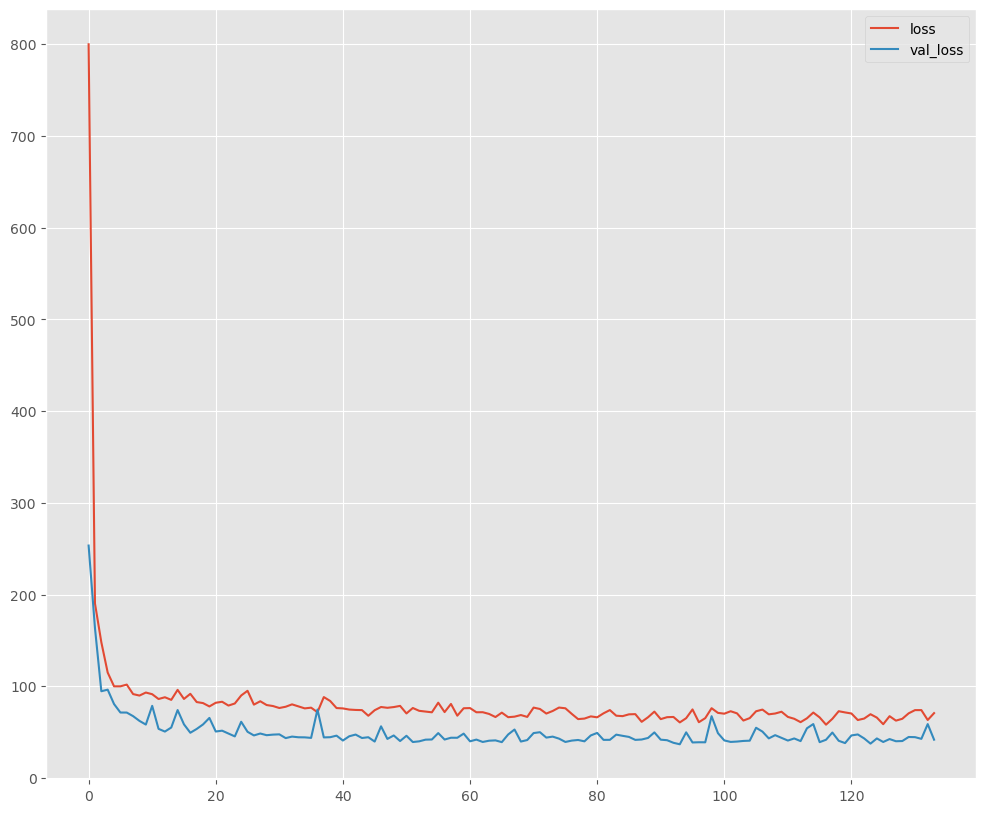

In [26]:
plt.style.use('ggplot')
pd.DataFrame(model.history.history).plot(figsize = (12,10))
plt.show()

In [27]:
model.evaluate(X_train,y_train)

11/11 [==============================] - 0s 748us/step - loss: 51.7600


51.7600212097168

In [28]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 1ms/step - loss: 41.7389


41.7389030456543

In [29]:
predictions = model.predict(X_test)
predictions_df = pd.DataFrame(np.ravel(predictions),columns=["Predictions"])
actual_df = pd.DataFrame(y_test.values, columns = ['Actual_values'])
comparison_df = pd.concat([actual_df, predictions_df],axis=1)
comparison_df 

3/3 [==============================] - 0s 1ms/step


,Actual_values,Predictions
0,45.1,44.844315
1,42.3,38.437515
2,52.2,49.362373
3,37.3,46.650074
4,22.8,22.867569
...,...,...
78,25.0,28.635620
79,23.5,30.016121
80,35.6,31.418694
81,46.1,49.391899




As seen above in the comparison dataframe, the predictions of the model is very close to the actual values.

In [30]:
print(y_test.shape, predictions.shape)

(83,) (83, 1)


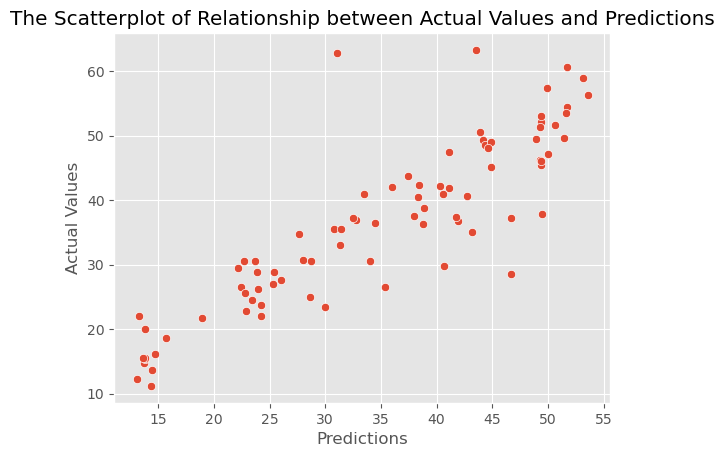

In [31]:
# here I will visualize the real test values(y_test) versus the predicted values.
# plt.figure(figsize=(12,10))
sns.scatterplot(x = np.ravel(predictions),y = y_test)
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
plt.show()
#It seems that our model predicts very well

In [32]:
# We will evaluate our model performance by calculating the residual sum of squares and the explained variance score

print("MAE:",metrics.mean_absolute_error(y_test,predictions))
print ("MSE:",metrics.mean_squared_error(y_test,predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 4.503290587735464
MSE: 41.738890751012846
RMSE: 6.460564274969552


The Mean Absolute Error is just 4.0 which is so small which shows that the model is almost as the actual values.

In [33]:
# Evaluation of  the explained variance score (R^2)
metrics.explained_variance_score(y_test,predictions) #This shows our model predict %93 of the target correctly

0.767803860551105

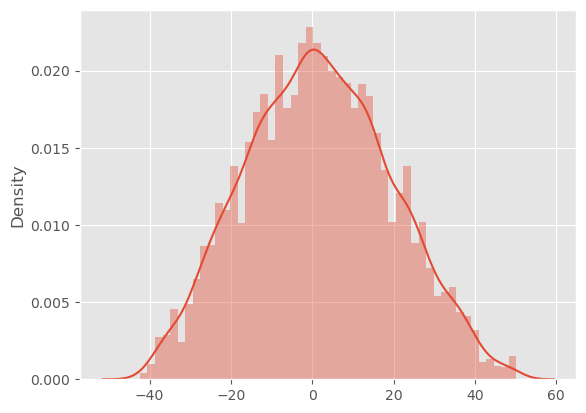

In [34]:
#Now we will visualize the differences between our predictions and actual y test data
# plt.figure(figsize=(12,10))
sns.distplot(y_test.values-predictions,bins=50) #this figure also proves that our model fits very good
plt.show()
#There is no huge differences between our predictions and actual y data